In [10]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
#sns.palplot(sns.color_palette("husl", 8))
import matplotlib.dates as mdates

In [11]:
# PEGASOR INDOOR AND OUTDOOR DATA
i_ldsa=pd.read_excel('/Users/stella/Desktop/realeco_sn0135-ldsa_2017-01-23t181000_2017-07-01t181000.xlsx')
i_ldsa=i_ldsa.set_index('time')
i_pn=pd.read_excel('/Users/stella/Desktop/realeco_sn0135-pm25_2017-01-19t181600_2017-07-01t181600.xlsx')
i_pn=i_pn.set_index('time')
i_pm25=pd.read_excel('/Users/stella/Desktop/realeco_sn0135-pn_2017-01-25t183900_2017-07-01t183900.xlsx')
i_pm25=i_pm25.set_index('time')

i_df=(i_ldsa.join(i_pn)).join(i_pm25).dropna()
i_df.columns=['i-ldsa','i-pm25','i-pn']

urban=pd.read_csv('/Users/stella/Desktop/1329_PEGASOR A_20170712185105-2.csv',delimiter=',')
urban['DateTime']=urban['DateTime'].apply(lambda x: parse(x))
urban.columns=['time','ldsa-1','pn-1','pm25-1','ldsa-2','pn-2','pm25-2']
urban['pn-1'].loc[:80034]=urban['pn-1'].loc[:80034]*6
urban['pn-2'].loc[:80033]=urban['pn-2'].loc[:80033]*6
urban=urban.set_index('time')

pegasor=i_df.join(urban).reset_index()
pegasor.head()

/Users/stella/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2
0,2017-01-25 13:39:00,3.304210,0.872990,368.935,12.260,60254.304,0.482,13.902,69804.708,0.558
1,2017-01-25 13:40:00,3.357189,0.875623,377.458,12.260,60254.304,0.482,12.866,64617.648,0.517
2,2017-01-25 13:41:00,3.398347,0.880263,383.497,12.260,60254.304,0.482,12.866,64617.648,0.517
3,2017-01-25 13:42:00,3.393449,0.850978,389.758,11.821,58093.008,0.465,9.837,49399.146,0.395
4,2017-01-25 13:43:00,3.272805,0.808077,378.986,11.821,58093.008,0.465,9.837,49399.146,0.395


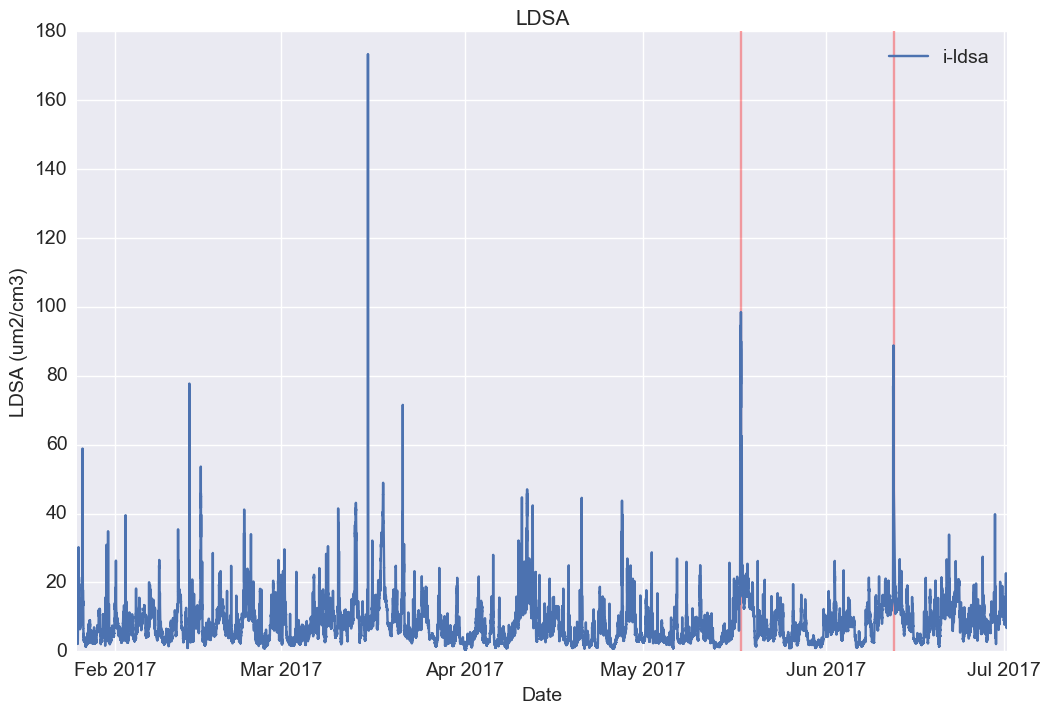

In [12]:
plt.figure(figsize=(12,8))
plt.plot(pegasor['time'][pegasor['i-ldsa']>0],pegasor['i-ldsa'][pegasor['i-ldsa']>0])

plt.axvspan(*mdates.datestr2num(['05/17/2017 10:30','05/17/2017 18:30']), color='red', alpha=0.3)
plt.axvspan(*mdates.datestr2num(['06/12/2017 6:30','06/12/2017 17:00']), color='red', alpha=0.3)
plt.legend(fontsize=14)
plt.title('LDSA',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('LDSA (um2/cm3)',fontsize=14)
plt.xlabel('Date',fontsize=14)

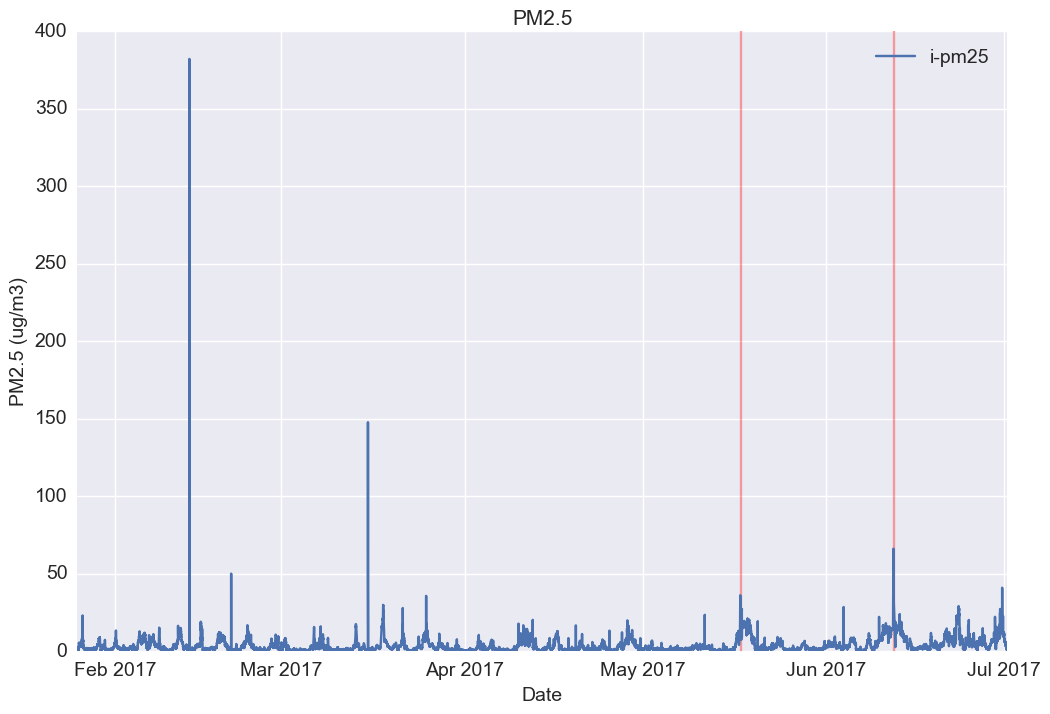

In [13]:
plt.figure(figsize=(12,8))
plt.plot(pegasor['time'][pegasor['i-pm25']>0],pegasor['i-pm25'][pegasor['i-pm25']>0])

plt.axvspan(*mdates.datestr2num(['05/17/2017 10:30','05/17/2017 18:30']), color='red', alpha=0.3)
plt.axvspan(*mdates.datestr2num(['06/12/2017 6:30','06/12/2017 17:00']), color='red', alpha=0.3)
plt.legend(fontsize=14)
plt.title('PM2.5',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('PM2.5 (ug/m3)',fontsize=14)
plt.xlabel('Date',fontsize=14)

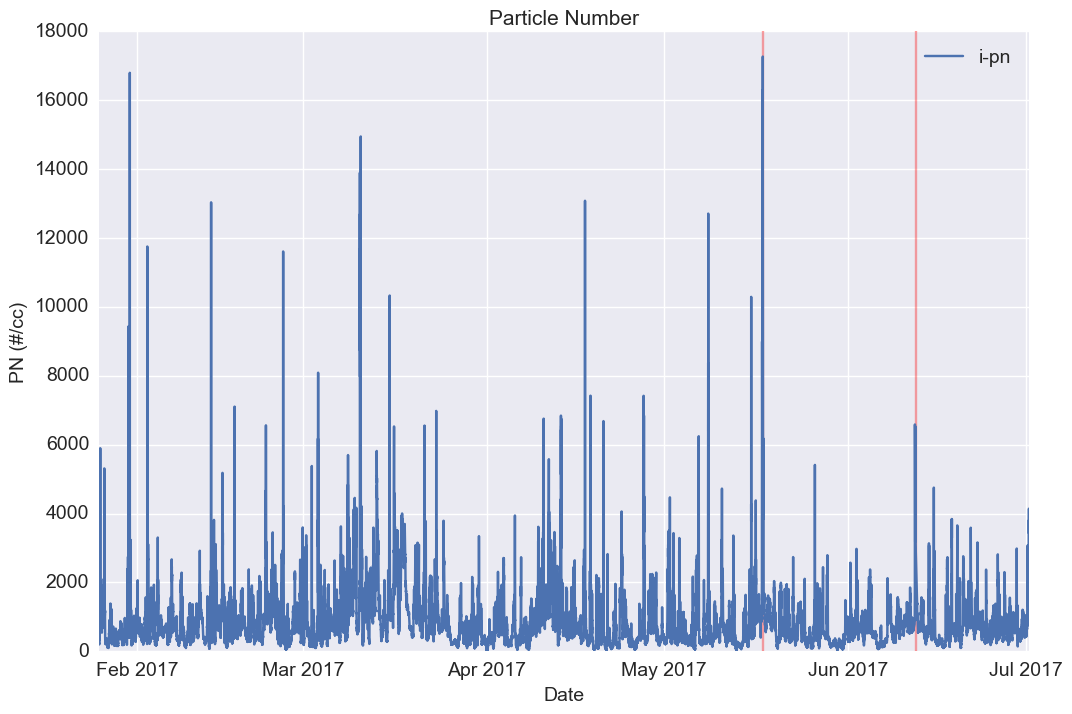

In [14]:
plt.figure(figsize=(12,8))
plt.plot(pegasor['time'][pegasor['i-pn']>0],pegasor['i-pn'][pegasor['i-pn']>0])
plt.axvspan(*mdates.datestr2num(['05/17/2017 10:30','05/17/2017 18:30']), color='red', alpha=0.3)
plt.axvspan(*mdates.datestr2num(['06/12/2017 6:30','06/12/2017 17:00']), color='red', alpha=0.3)

plt.legend(fontsize=14)
plt.title('Particle Number',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('PN (#/cc)',fontsize=14)
plt.xlabel('Date',fontsize=14)

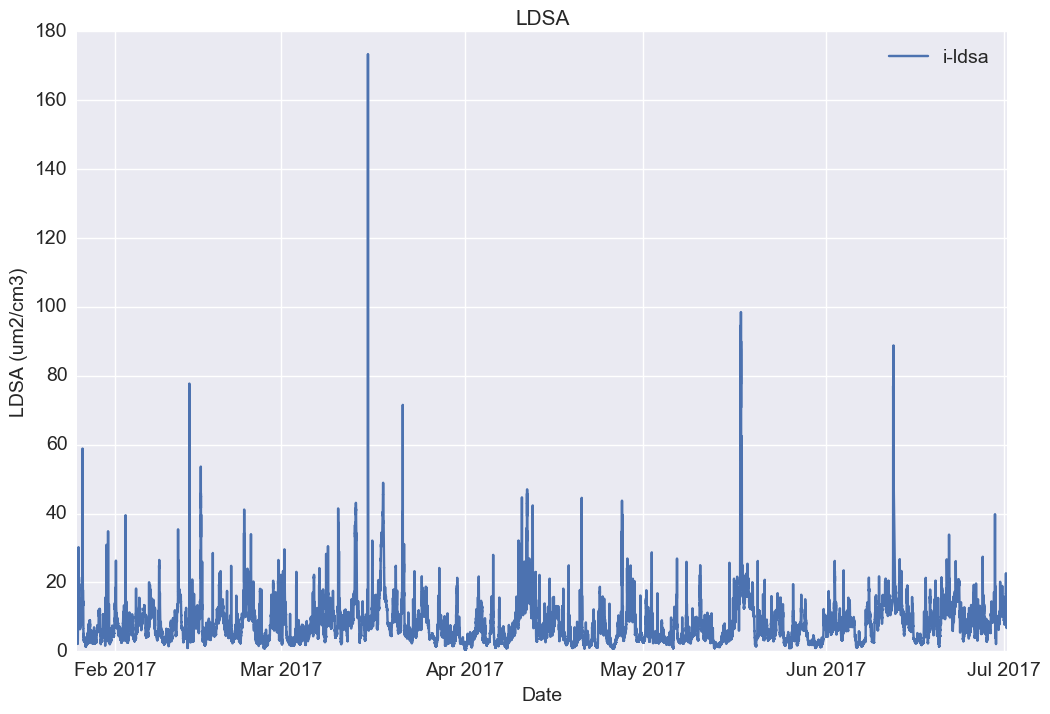

In [15]:
plt.figure(figsize=(12,8))
plt.plot(pegasor['time'][pegasor['i-ldsa']>0],pegasor['i-ldsa'][pegasor['i-ldsa']>0])

#plt.axhspan(2, 200, facecolor='0.2', alpha=0.5)

plt.legend(fontsize=14)
plt.title('LDSA',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('LDSA (um2/cm3)',fontsize=14)
plt.xlabel('Date',fontsize=14)

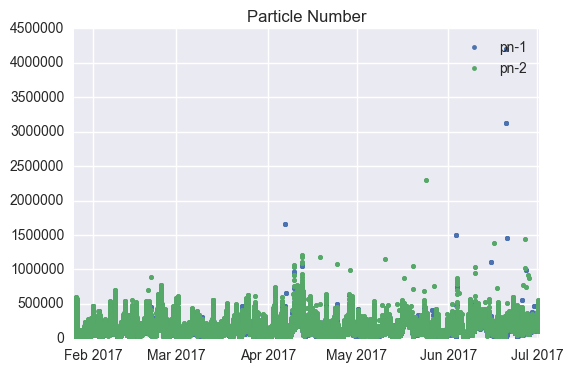

In [16]:
plt.plot(pegasor['time'][pegasor['pn-1']>0],pegasor['pn-1'][pegasor['pn-1']>0],'.')
plt.plot(pegasor['time'][pegasor['pn-2']>0],pegasor['pn-2'][pegasor['pn-2']>0],'.')
plt.legend()
plt.title('Particle Number')

In [17]:
pegasor[pegasor['pn-1']>3e6]

,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2
210565,2017-06-20 10:50:00,13.456540,3.055078,1630.342,540.479,3118495.605,21.384,39.296,226265.503,1.552
210566,2017-06-20 10:51:00,14.528171,3.099333,1820.668,540.479,3118495.605,21.384,39.296,226265.503,1.552
210567,2017-06-20 10:52:00,14.142046,2.857757,1824.244,540.479,3118495.605,21.384,40.871,235354.370,1.614
210568,2017-06-20 10:53:00,13.640659,2.794165,1746.830,540.479,3118495.605,21.384,40.871,235354.370,1.614
210569,2017-06-20 10:54:00,13.522952,2.867398,1699.770,540.479,3118495.605,21.384,41.959,242401.840,1.662
210715,2017-06-20 13:20:00,15.257680,3.680414,1789.117,730.515,4192789.551,28.751,50.346,289714.081,1.987
210716,2017-06-20 13:21:00,15.137821,3.703457,1761.640,730.515,4192789.551,28.751,50.346,289714.081,1.987
210717,2017-06-20 13:22:00,14.987506,3.748497,1723.546,730.515,4192789.551,28.751,48.577,279369.965,1.916
210718,2017-06-20 13:23:00,14.882284,3.770773,1699.509,730.515,4192789.551,28.751,48.577,279369.965,1.916
210719,2017-06-20 13:24:00,14.717926,3.772056,1670.418,730.515,4192789.551,28.751,48.047,275990.845,1.893


In [18]:
pegasor[pegasor['pn-2']>4e6]

,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2


In [19]:
urban=urban[(urban > 0).all(1)]
len(urban)

227089

In [20]:
urban.head()

,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2
time,,,,,,
2017-01-25 00:00:00,8.061,39630.570,0.317,7.555,37707.948,0.302
2017-01-25 00:01:00,8.061,39630.570,0.317,7.555,37707.948,0.302
2017-01-25 00:02:00,6.738,33129.012,0.265,7.691,38427.264,0.307
2017-01-25 00:03:00,6.738,33129.012,0.265,7.691,38427.264,0.307
2017-01-25 00:04:00,6.738,33129.012,0.265,5.979,29921.796,0.239


In [21]:
x=urban['pn-1']
y=urban['pn-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.865892392075


In [22]:
peg=pegasor[pegasor['time']>datetime.date(2017,2,1)].reset_index()
del peg['index']

In [23]:
peg=peg[(peg>0).all(1)]

In [24]:
times=pd.DatetimeIndex(peg.time)

In [25]:
peg_grouped=peg.groupby([times.month, times.day]).mean().reset_index()

In [26]:
peg_grouped=peg_grouped.rename(columns={'level_0':'month','level_1':'day'})

In [27]:
peg_grouped['year']=2017

In [28]:
peg_grouped['date']=pd.to_datetime(peg_grouped[['year','month','day']])

In [29]:
del peg_grouped['month'], peg_grouped['day'], peg_grouped['year']

In [30]:
peg_grouped.head()

,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2,date
0,7.242743,3.211304,632.654993,26.793141,132110.632318,1.056891,26.426431,132166.994645,1.057346,2017-02-01
1,6.367503,1.597631,869.714774,24.481489,120462.615598,0.963688,23.191969,115712.682995,0.925711,2017-02-02
2,6.746143,1.836561,789.076430,27.737306,136719.551701,1.093741,26.273988,131720.875010,1.053786,2017-02-03
3,6.298415,3.033452,585.369315,19.760162,97374.034395,0.779001,19.308122,96656.908781,0.773249,2017-02-04
4,10.473060,8.524211,641.973569,30.249308,148966.151813,1.191741,29.207795,145922.656784,1.167384,2017-02-05


In [31]:
x=peg_grouped['pm25-1']
y=peg_grouped['pm25-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.992610322204


In [32]:
x=peg_grouped['pn-1']
y=peg_grouped['pn-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.99298189546


In [33]:
x=peg_grouped['ldsa-1']
y=peg_grouped['ldsa-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

r-squared: 0.991042623175


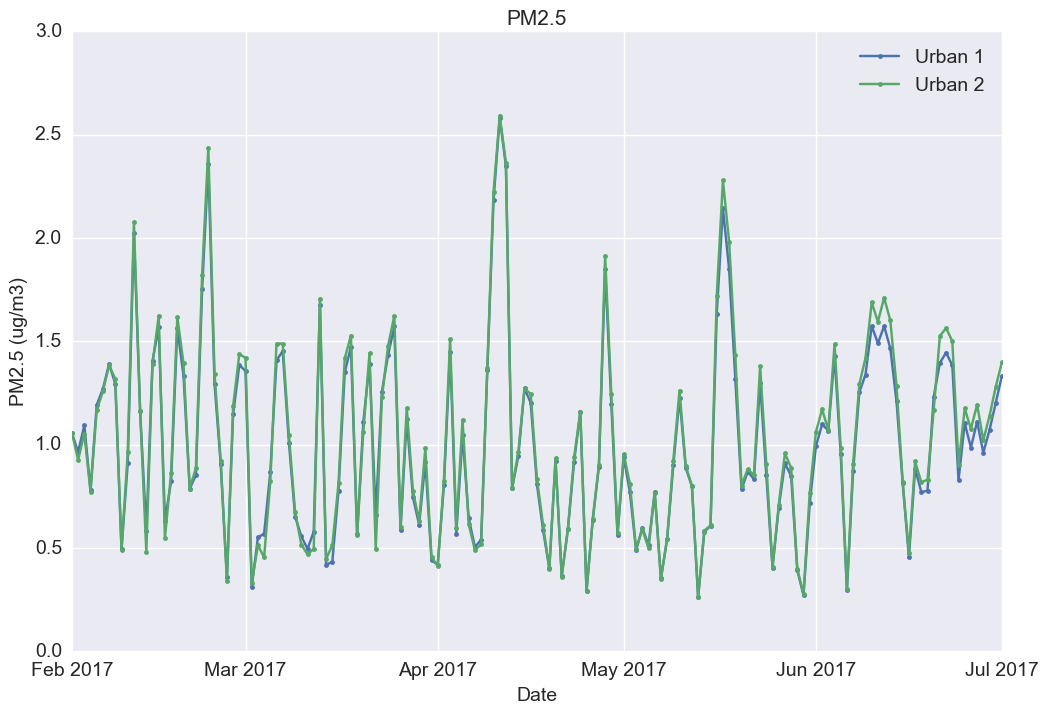

In [34]:
plt.figure(figsize=(12,8))
plt.plot(peg_grouped['date'],peg_grouped['pm25-1'],'.-',label='Urban 1')
plt.plot(peg_grouped['date'],peg_grouped['pm25-2'],'.-',label='Urban 2')
plt.legend(fontsize=14)
plt.title('PM2.5',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('PM2.5 (ug/m3)',fontsize=14)
plt.xlabel('Date',fontsize=14)

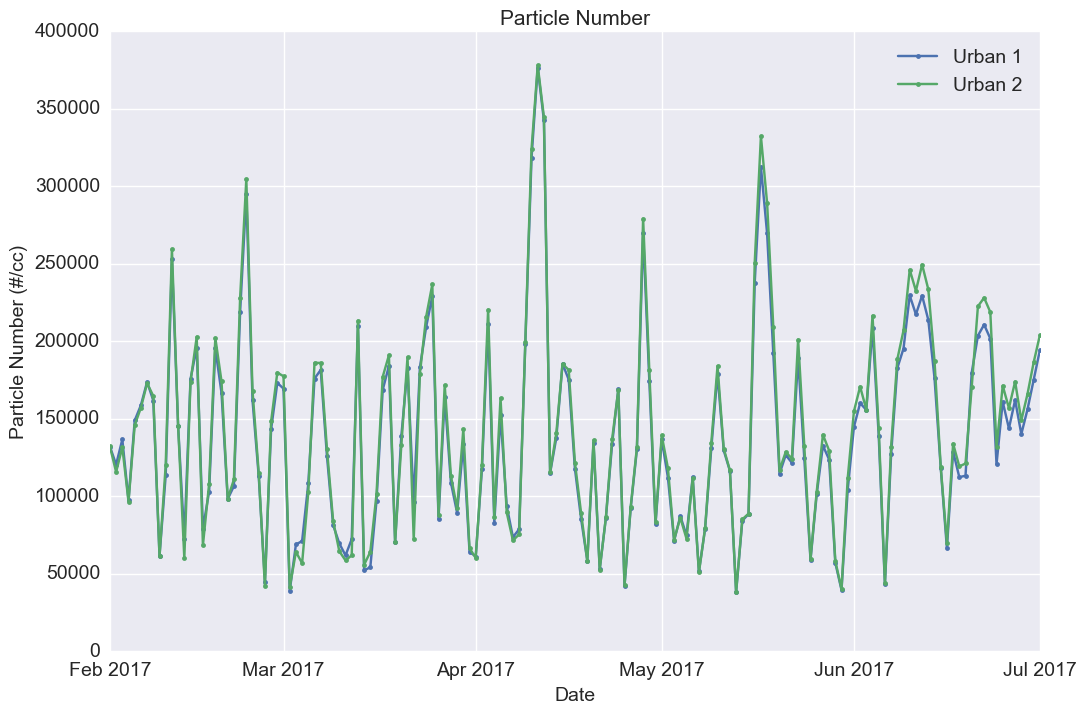

In [35]:
plt.figure(figsize=(12,8))
plt.plot(peg_grouped['date'],peg_grouped['pn-1'],'.-',label='Urban 1')
plt.plot(peg_grouped['date'],peg_grouped['pn-2'],'.-',label='Urban 2')
plt.legend(fontsize=14)
plt.title('Particle Number',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Particle Number (#/cc)',fontsize=14)
plt.xlabel('Date',fontsize=14)

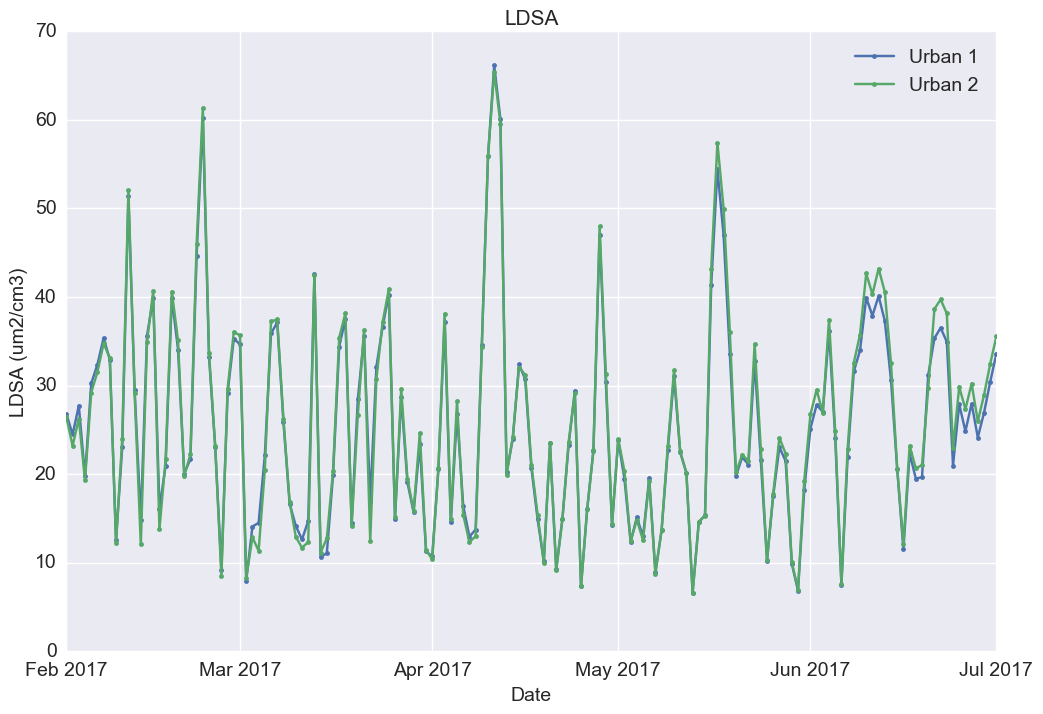

In [36]:
plt.figure(figsize=(12,8))
plt.plot(peg_grouped['date'],peg_grouped['ldsa-1'],'.-',label='Urban 1')
plt.plot(peg_grouped['date'],peg_grouped['ldsa-2'],'.-',label='Urban 2')
plt.legend(fontsize=14)
plt.title('LDSA',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('LDSA (um2/cm3)',fontsize=14)
plt.xlabel('Date',fontsize=14)

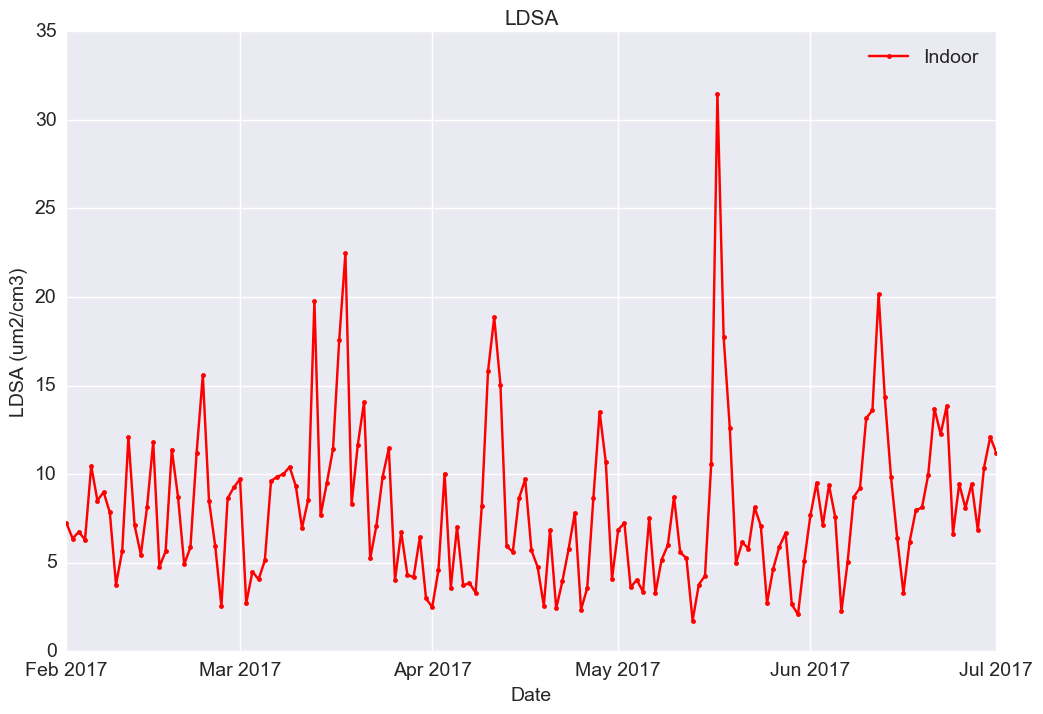

In [37]:
plt.figure(figsize=(12,8))
plt.plot(peg_grouped['date'],peg_grouped['i-ldsa'],'r.-',label='Indoor')
plt.legend(fontsize=14)
plt.title('LDSA',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('LDSA (um2/cm3)',fontsize=14)
plt.xlabel('Date',fontsize=14)

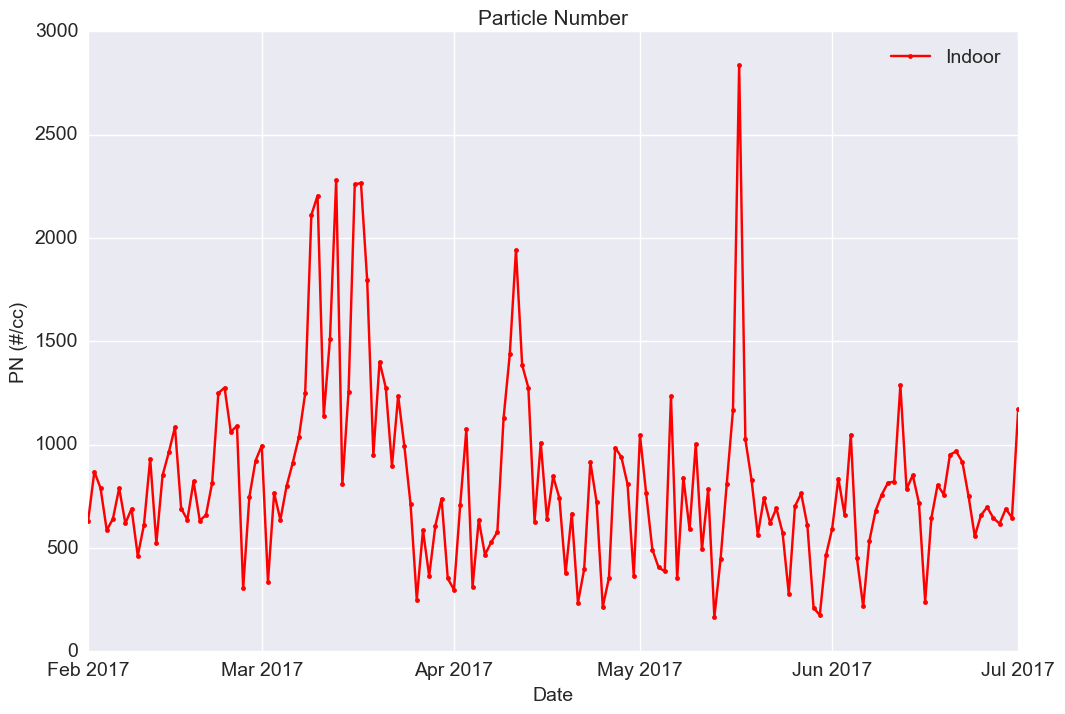

In [38]:
plt.figure(figsize=(12,8))
plt.plot(peg_grouped['date'],peg_grouped['i-pn'],'r.-',label='Indoor')
plt.legend(fontsize=14)
plt.title('Particle Number',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('PN (#/cc)',fontsize=14)
plt.xlabel('Date',fontsize=14)

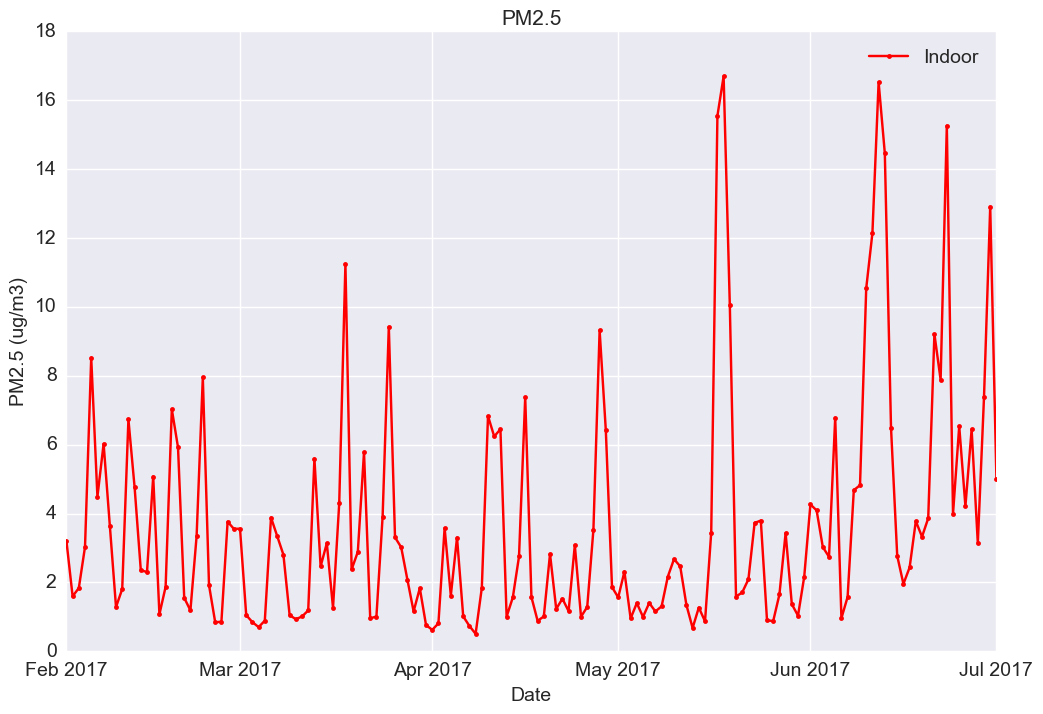

In [39]:
plt.figure(figsize=(12,8))
plt.plot(peg_grouped['date'],peg_grouped['i-pm25'],'r.-',label='Indoor')
plt.legend(fontsize=14)
plt.title('PM2.5',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('PM2.5 (ug/m3)',fontsize=14)
plt.xlabel('Date',fontsize=14)

In [40]:
may=peg[(peg['time']>datetime.datetime(2017,5,17,10,30)) & (peg['time']<datetime.datetime(2017,5,17,18,30))].reset_index()
june=peg[(peg['time']>datetime.datetime(2017,6,12,6,30)) & (peg['time']<datetime.datetime(2017,6,12,17))].reset_index()

In [41]:
may.head()

,index,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2
0,152439,2017-05-17 10:31:00,16.594751,12.750115,1042.800,53.995,309380.859,2.121,56.293,326289.246,2.237
1,152440,2017-05-17 10:32:00,16.507118,12.751573,1034.278,52.728,302508.423,2.074,57.254,331666.138,2.274
2,152441,2017-05-17 10:33:00,16.252691,12.580621,1017.221,52.728,302508.423,2.074,57.254,331666.138,2.274
3,152442,2017-05-17 10:34:00,16.228483,12.677017,1010.729,52.728,302508.423,2.074,57.786,334886.444,2.296
4,152443,2017-05-17 10:35:00,15.915176,12.429617,991.337,52.728,302508.423,2.074,57.786,334886.444,2.296


In [42]:
len(may), len(mayt)

NameError: name 'mayt' is not defined

In [43]:
may=may.reset_index()
mayt=mayt.reset_index()

NameError: name 'mayt' is not defined

In [44]:
pd.merge(may,mayt,on='time')

NameError: name 'mayt' is not defined

In [45]:
datetime.datetime.now().strftime("%H:%M")

'14:06'

In [46]:
may['time-2']=may['time'].apply(lambda x: x.strftime("%H:%M"))

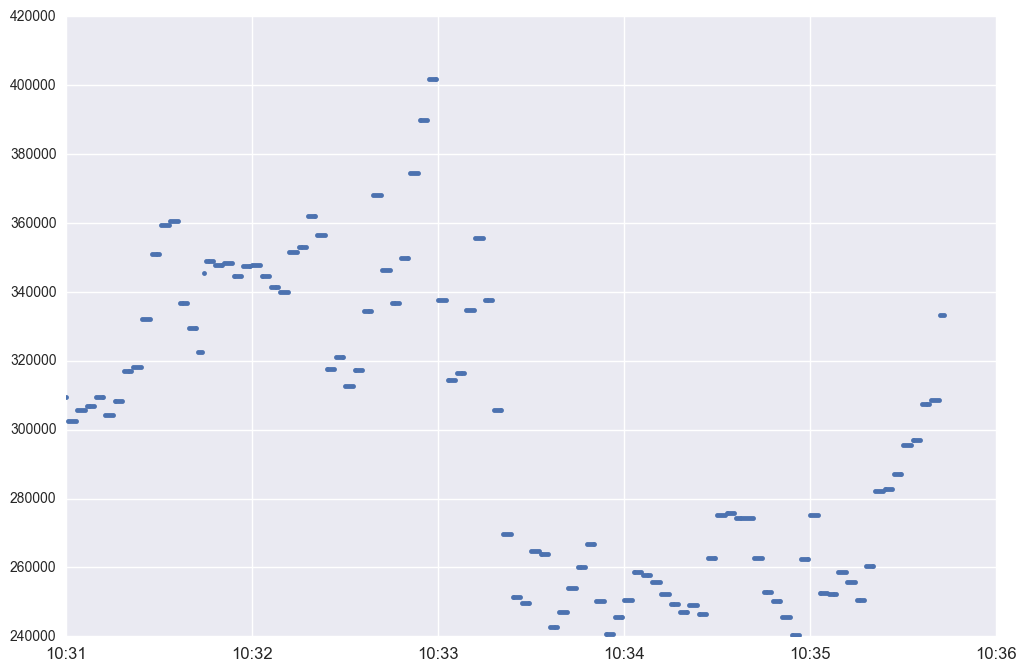

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(may['pn-1'],'.')
ax.set_xticklabels(may['time-2'],rotation=0,fontsize=12)

In [48]:
may=pd.merge(may,mayt,on='time')

NameError: name 'mayt' is not defined

In [ ]:
del may['index_x'], may['index_y']

In [ ]:
may['time'].unique()

In [49]:
may['time'][0]

Timestamp('2017-05-17 10:31:00')

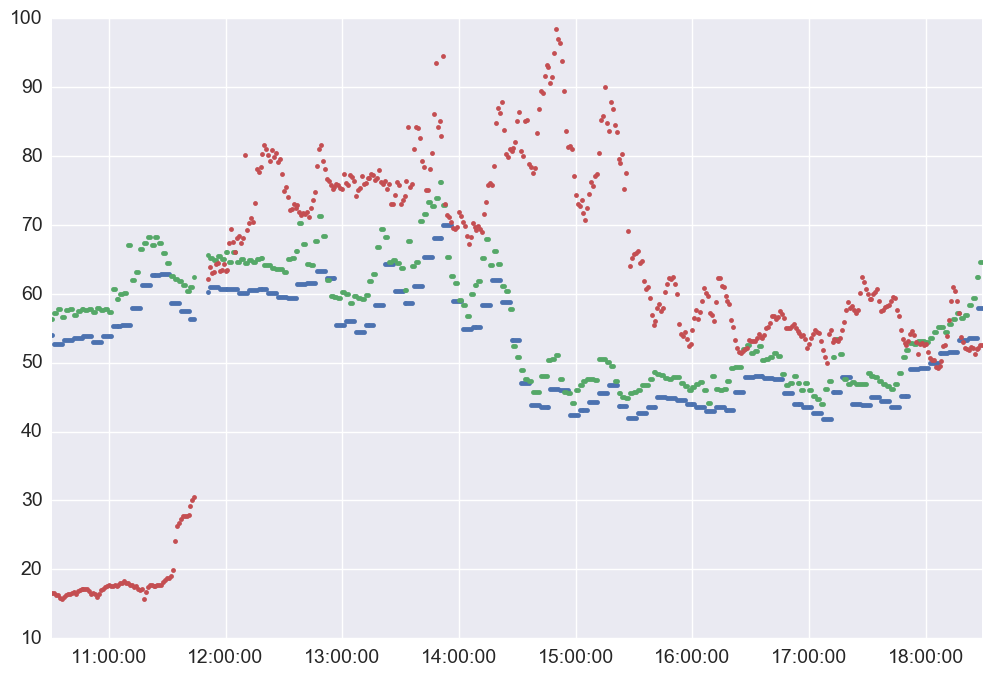

In [50]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(may['time'],may['ldsa-1'],'.')
plt.plot(may['time'],may['ldsa-2'],'.')
plt.plot(may['time'],may['i-ldsa'],'.')

In [51]:
plt.figure(figsize=(12,8))
plt.plot(may['time'],may['PM2.5_FEM_MC'],'.')
plt.plot(may['time'],may['pm25-1'],'.')
plt.plot(may['time'],may['pm25-2'],'.')
plt.plot(may['time'],may['i-pm25'],'.')

KeyError: 'PM2.5_FEM_MC'

In [52]:
plt.figure(figsize=(12,8))
plt.plot(mayt['time'],mayt['PM2.5_FEM_MC'],'.',label='TEOM')
plt.plot(may['time'],may['pm25-1'],'.',label='Urban 1')
plt.plot(may['time'],may['pm25-2'],'.',label='Urban 2')
plt.plot(may['time'],may['i-pm25'],'.',label='Indoor')
plt.legend(fontsize=14)
plt.title('PM2.5',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('PM2.5 (ug/m3)',fontsize=14)
plt.xlabel('Date',fontsize=14)

NameError: name 'mayt' is not defined

In [ ]:
len(mayt),len(may)

In [ ]:
len(pd.merge(mayt, may, on='time', how='outer')), len(mayt)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(junet['time'],junet['PM2.5_FEM_MC'],'.',label='TEOM')
plt.plot(june['time'],june['pm25-1'],'.',label='Urban 1')
plt.plot(june['time'],june['pm25-2'],'.',label='Urban 2')
plt.plot(june['time'],june['i-pm25'],'.',label='Indoor')
plt.legend(fontsize=14)
plt.title('PM2.5',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('PM2.5 (ug/m3)',fontsize=14)
plt.xlabel('Date',fontsize=14)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(junet['time'],junet['PM2.5_FEM_MC'],'-',label='TEOM')
plt.plot(june['time'],june['pm25-1'],'.',label='Urban 1')
plt.plot(june['time'],june['pm25-2'],'.',label='Urban 2')
plt.plot(june['time'],june['i-pm25'],'.',label='Indoor')
plt.legend(fontsize=14)
plt.title('PM2.5',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('PM2.5 (ug/m3)',fontsize=14)
plt.xlabel('Date',fontsize=14)

In [54]:
mayt=teom[(teom['time']>datetime.datetime(2017,5,17,10,30)) & (teom['time']<datetime.datetime(2017,5,17,18,30))].reset_index()
junet=teom[(teom['time']>datetime.datetime(2017,6,12,6,30)) & (teom['time']<datetime.datetime(2017,6,12,17))].reset_index()

NameError: name 'teom' is not defined

In [ ]:
del junet['index'], mayt['index']
del june['index'], may['index']

In [ ]:
list(teom['time'])

In [ ]:
teom['PM2.5_FEM_MC']=pd.to_numeric(teom['PM2.5_FEM_MC'], errors='coerce')
teom['PM2.5_MC']=pd.to_numeric(teom['PM2.5_MC'], errors='coerce')

In [ ]:
teom=teom.dropna()
teom=teom[(teom > 0).all(1)]

In [ ]:
teom=teom.reset_index()
del teom['index']

In [ ]:
x=teom['PM2.5_FEM_MC']
y=teom['PM2.5_MC']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

In [ ]:
times=pd.DatetimeIndex(teom.time)
teom_grouped=teom.groupby([times.month, times.day]).mean().reset_index()

In [ ]:
teom_grouped=teom_grouped.rename(columns={'level_0':'month','level_1':'day'})
teom_grouped['year']=2017
teom_grouped['date']=pd.to_datetime(teom_grouped[['year','month','day']])

In [ ]:
del teom_grouped['month'],teom_grouped['day'],teom_grouped['year']

In [ ]:
len(teom_grouped), len(peg_grouped)

In [ ]:
teom_grouped=teom_grouped.set_index('date')
peg_grouped=peg_grouped.set_index('date')

In [ ]:
teom_peg_grouped=teom_grouped.join(peg_grouped)

In [ ]:
test=teom_peg_grouped.copy(False)

In [ ]:
test

In [ ]:
test=test.rename(columns={'PM2.5_FEM_MC':'TEOM PM2.5 FEM','PM2.5_MC':'TEOM PM2.5'}).reset_index()

In [ ]:
test.head()

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(test['date'],test['TEOM PM2.5 FEM'],'.-',label='TEOM')
plt.plot(test['date'],test['pm25-1'],'.-',label='Urban 1')
plt.plot(test['date'],test['pm25-2'],'.-',label='Urban 2')
plt.legend(fontsize=14)
plt.title('PM2.5',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('PM2.5 (ug/m3)',fontsize=14)
plt.xlabel('Date',fontsize=14)

In [ ]:
x=test['TEOM PM2.5 FEM']
y=test['pm25-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

In [ ]:
x=test['TEOM PM2.5 FEM']
y=test['pm25-1']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

In [55]:
#feb-april     TEOM
feb_apr_teom=pd.read_excel('/Users/stella/Desktop/queens-data/Queens Data Logger TEOM 1 Hour Data February to April.xls')[:-8]
feb_apr_teom = feb_apr_teom.rename(columns=feb_apr_teom.iloc[1])
feb_apr_teom = feb_apr_teom[3:]
feb_apr_teom=feb_apr_teom[['Date&Time','PM2.5_FEM_MC','PM2.5_MC']]
feb_apr_teom['Date&Time']=feb_apr_teom['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

#may-june      TEOM
may_jun_teom=pd.read_csv('/Users/stella/Desktop/queens-data/TEOM_TSI 3783_May-June_2017.csv')[:-8]
may_jun_teom = may_jun_teom.rename(columns=may_jun_teom.iloc[1])
may_jun_teom = may_jun_teom[3:]
may_jun_teom=may_jun_teom[['Date&Time','PM2.5_FEM_MC','PM2.5_MC']]
may_jun_teom['Date&Time']=may_jun_teom['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

teom=pd.concat([feb_apr_teom,may_jun_teom])
teom.head()

,Date&Time,PM2.5_FEM_MC,PM2.5_MC
3,2017-02-01 00:00:00,18.25,20.02
4,2017-02-01 01:00:00,19.18,20.98
5,2017-02-01 02:00:00,14.51,16.15
6,2017-02-01 03:00:00,15.93,17.63
7,2017-02-01 04:00:00,10.82,12.25


In [56]:
teom=teom.reset_index()
del teom['index']

In [57]:
teom=teom.rename(columns={'Date&Time':'time'})

In [58]:
teom_grouped=teom.groupby([times.month, times.day]).mean().reset_index()

AssertionError: Grouper and axis must be same length

In [59]:
teom2=teom[teom['PM2.5_FEM_MC']!='---']

In [60]:
teom2=teom2.reset_index()
del teom2['index']

In [61]:
times=pd.DatetimeIndex(teom2.time)

In [62]:
#april         3783
apr_3783=pd.read_excel('/Users/stella/Desktop/queens-data/Queens Data Logger TSI 3783 Ultrafine February to April.xls')[1:-8]
apr_3783['Date&Time']=apr_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

#may-june      3783
may_jun_3783=pd.read_csv('/Users/stella/Desktop/queens-data/TEOM_TSI 3783_May-June_2017.csv')[:-8]
may_jun_3783 = may_jun_3783.rename(columns=may_jun_3783.iloc[1])
may_jun_3783 = may_jun_3783[3:]
may_jun_3783=may_jun_3783[['Date&Time','UF Aggregated Conc.']]
may_jun_3783['Date&Time']=may_jun_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M %p'))

tsi_3783=pd.concat([apr_3783,may_jun_3783])
tsi_3783.head()

,Date&Time,UF Aggregated Conc.
1,2017-04-11 08:00:00,24268
2,2017-04-11 09:00:00,24445
3,2017-04-11 10:00:00,36088
4,2017-04-11 11:00:00,38883
5,2017-04-11 12:00:00,46482


In [63]:
#april         3031
apr_3031=pd.read_csv('/Users/stella/Desktop/queens-data/TSI 3031 Particle Counter_20170413-april.TXT',delimiter='\t',skiprows=4)
apr_3031=apr_3031.reset_index()
apr_3031.columns=apr_3031.iloc[0]
apr_3031=apr_3031.iloc[1:].reset_index()
apr_3031['start']=apr_3031['start'].apply(lambda x: parse(x))
apr_3031['end']=apr_3031['end'].apply(lambda x: parse(x))
apr_3031=apr_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

#may-june      3031
may_jun_3031=pd.read_csv('/Users/stella/Desktop/queens-data/TSI 3031_20170501.TXT',delimiter='\t',skiprows=4)
may_jun_3031=may_jun_3031.reset_index()
may_jun_3031.columns=may_jun_3031.iloc[0]
may_jun_3031=may_jun_3031.iloc[1:].reset_index()
may_jun_3031['start']=may_jun_3031['start'].apply(lambda x: parse(x))
may_jun_3031['end']=may_jun_3031['end'].apply(lambda x: parse(x))
may_jun_3031=may_jun_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

tsi_3031=pd.concat([apr_3031,may_jun_3031])
tsi_3031.head()

,start,end,ch1,ch2,ch3,ch4,ch5,ch6
0,2017-04-13 12:45:07,2017-04-13 12:59:37,8748.000,2974.000,81.000,73.000,254.000,17.000
1,2017-04-13 13:00:06,2017-04-13 13:14:36,9518.000,3887.000,216.000,39.000,218.000,15.000
2,2017-04-13 13:15:06,2017-04-13 13:29:36,10216.000,4318.000,215.000,95.000,313.000,1.000
3,2017-04-13 13:30:06,2017-04-13 13:44:36,11028.000,4295.000,232.000,205.000,399.000,0.000
4,2017-04-13 13:45:07,2017-04-13 13:59:37,11412.000,6271.000,650.000,0.000,115.000,51.000


In [64]:
#plt.plot(tsi_3783['Date&Time'],tsi_3783['UF Aggregated Conc.'])

In [65]:
tsi_3783[tsi_3783['UF Aggregated Conc.'].str.contains('---')==True]

,Date&Time,UF Aggregated Conc.
43867,2017-05-31 11:04:00,---


In [66]:
#print(df.iloc[_])
tsi_3783.iloc['---']

TypeError: cannot do positional indexing on <class 'pandas.indexes.numeric.Int64Index'> with these indexers [---] of <class 'str'>

In [ ]:
#tsi_3783.select_dtypes(include=['string'])

#tsi_3783['Date&Time'][(tsi_3783['Date&Time']=='---')==True]
#msk = tsi_3783['Date&Time'].dtypes == 

#tsi_3783[tsi_3783['Date&Time'].str.contains("---")]

tsi_3783[tsi_3783['Date&Time'].str.contains("---")]

In [ ]:
time=tsi_3783['Date&Time'].astype(str)

In [ ]:
time[time.str.contains("---")]